# Entertainment Genres

# Setting Up Necessary Things

In [ ]:
# Jupyter Notebook Magic Command - Auto Reloading
%reload_ext autoreload
%autoreload 2

# Jupyter Notebook Magic Command - Inline Plotting
%matplotlib inline

In [ ]:
# Ignore All Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# NVIDIA Status
! nvidia-smi

Thu Sep 14 15:37:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/All Entertainment Classification

/content/drive/MyDrive/All Entertainment Classification


# Necessary Imports

In [ ]:
! pip install -q transformers sentencepiece fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch

from transformers import AutoModelForSequenceClassification, AutoConfig

from fastai.text.all import *

from blurr.text.data.all import *
from blurr.text.modeling.all import *

# Data Cleaning

In [ ]:
# Load Data Into DataFrame
df = pd.read_csv("data/processed/genres/genres_classification.csv")
df.head()

,description,genres
0,"Comedy about one big happy family and their sometimes awkward, often hilarious and ultimately beautiful milestone moments as told by its various members. Of the three siblings, middle child Matt may have just found his true love, his co-worker, Colleen; his coddled youngest brother, Greg, and his wife, Jen, are overwhelmed by the birth of their first child; and the eldest, Heather, and her husband, Tim, are dreading their impending empty nest so much, they're considering having another baby. Their parents are Joan the family's adoring matriarch who would do anything for her kids - as long...",comedy
1,"A crew of kid pirates - leader Jake and pals Izzy and Cubby - and their Never Land adventures as they work to outwit two infamous characters, the one and only Captain Hook and Smee.","action, family, fantasy, animation"
2,"In the Shadow of Young Girls in Flower is Proust’s spectacular dissection of male and female adolescence, charged with the narrator’s memories of Paris and the Normandy seaside. At the heart of the story lie his relationships with his grandmother and with the Swann family. As a meditation on different forms of love, In the Shadow of Young Girls in Flower has no equal. Here, Proust introduces some of his greatest comic inventions, from the magnificently dull M. de Norpois to the enchanting Robert de Saint-Loup. It is memorable as well for the first appearance of the two figures who for bett...","Fiction, Classics, Cultural, France, European Literature, French Literature, Literature"
3,Outside watching as the day slowly fades away\nHoping that you'll stay right here beside me\nWrapped around me\nThe pink galahs are sitting in the trees\nIn the summer breeze just like you and me\nThey found each other\nAnd wn't find another\n\nUnderneath two different skies\nIs where we fall too many times\nJust close your eyes and they'll collide\n\nFollow me and I'l follow you\nAnd we'll make it through the night\nFly wherever we want to\nOnce we reach the other side\nYou'll find me waiting in the branches\nFor yu to remind me\nYou're my pink Galah\nThe morning sun shining through the p...,pop
4,"A young man is accused of his ex-girlfriend's murder. Before he is formally charged by the police, he sets out on a two-day odyssey to find the real killer: tracking down his leads from the... See full summary »",Thriller


In [ ]:
# Shape of the DataFrame
df.shape

(24877, 2)

In [ ]:
# Genres
genres_list = [
    str([a.strip() for a in x.split(",")])
    for x in df["genres"]
]

genres_list[:5]

["['comedy']",
 "['action', 'family', 'fantasy', 'animation']",
 "['Fiction', 'Classics', 'Cultural', 'France', 'European Literature', 'French Literature', 'Literature']",
 "['pop']",
 "['Thriller']"]

In [ ]:
df["genres"] = genres_list

In [ ]:
df.head()

,description,genres
0,"Comedy about one big happy family and their sometimes awkward, often hilarious and ultimately beautiful milestone moments as told by its various members. Of the three siblings, middle child Matt may have just found his true love, his co-worker, Colleen; his coddled youngest brother, Greg, and his wife, Jen, are overwhelmed by the birth of their first child; and the eldest, Heather, and her husband, Tim, are dreading their impending empty nest so much, they're considering having another baby. Their parents are Joan the family's adoring matriarch who would do anything for her kids - as long...",['comedy']
1,"A crew of kid pirates - leader Jake and pals Izzy and Cubby - and their Never Land adventures as they work to outwit two infamous characters, the one and only Captain Hook and Smee.","['action', 'family', 'fantasy', 'animation']"
2,"In the Shadow of Young Girls in Flower is Proust’s spectacular dissection of male and female adolescence, charged with the narrator’s memories of Paris and the Normandy seaside. At the heart of the story lie his relationships with his grandmother and with the Swann family. As a meditation on different forms of love, In the Shadow of Young Girls in Flower has no equal. Here, Proust introduces some of his greatest comic inventions, from the magnificently dull M. de Norpois to the enchanting Robert de Saint-Loup. It is memorable as well for the first appearance of the two figures who for bett...","['Fiction', 'Classics', 'Cultural', 'France', 'European Literature', 'French Literature', 'Literature']"
3,Outside watching as the day slowly fades away\nHoping that you'll stay right here beside me\nWrapped around me\nThe pink galahs are sitting in the trees\nIn the summer breeze just like you and me\nThey found each other\nAnd wn't find another\n\nUnderneath two different skies\nIs where we fall too many times\nJust close your eyes and they'll collide\n\nFollow me and I'l follow you\nAnd we'll make it through the night\nFly wherever we want to\nOnce we reach the other side\nYou'll find me waiting in the branches\nFor yu to remind me\nYou're my pink Galah\nThe morning sun shining through the p...,['pop']
4,"A young man is accused of his ex-girlfriend's murder. Before he is formally charged by the police, he sets out on a two-day odyssey to find the real killer: tracking down his leads from the... See full summary »",['Thriller']


In [ ]:
genres_list = df["genres"].to_list()
genres_count = {}

for genres in genres_list:
  try:
    genre_list = eval(genres)

    for genre in genre_list:
      if genre in genres_count.keys():
        genres_count[genre] += 1
      else:
        genres_count[genre] = 1
  except:
    continue

In [ ]:
print("Total Number of Genres: ", len(genres_count))

sorted_genres_count = dict(sorted(genres_count.items(), key=lambda item: item[1], reverse=True))
print("Individual Genres Count: \n", sorted_genres_count)

Total Number of Genres:  692
Individual Genres Count: 
 {'Fantasy': 4445, 'Action': 4365, 'Adventure': 3978, 'Romance': 3745, 'Indie': 3180, 'Drama': 2957, 'Fiction': 2919, 'Comedy': 2754, 'Casual': 1875, 'Mystery': 1683, 'Historical': 1264, 'Nonfiction': 1223, 'Young Adult': 1215, 'Horror': 1213, 'Sci-Fi': 1156, 'Thriller': 1108, 'Crime': 1036, 'pop': 1004, 'Simulation': 951, 'Strategy': 907, 'comedy': 814, 'Paranormal': 814, 'RPG': 809, 'drama': 767, 'Childrens': 734, 'Contemporary': 716, 'Historical Fiction': 713, 'rap': 695, 'Science Fiction': 694, 'Classics': 594, 'History': 580, 'Supernatural': 552, 'Early Access': 549, 'Cultural': 545, 'Biography': 541, 'rock': 482, 'UNKNOWN': 476, 'Literature': 463, 'Sports': 459, 'Religion': 435, 'animation': 430, 'documentation': 418, 'War': 412, 'Slice of Life': 395, 'Free to Play': 390, 'family': 384, 'Sequential Art': 365, 'Humor': 355, 'action': 348, 'scifi': 347, 'Autobiography': 325, 'reality': 322, 'Family': 313, 'fantasy': 297, 'Henta

## Removing Rare Genres

In [ ]:
int(len(df) * 0.035)

870

In [ ]:
threshold = int(len(df) * 0.035)

rare_genres = [item for item, count in genres_count.items() if count < threshold]

print("Total Rare Genres: ", len(rare_genres))
print("Rare Genres: ", rare_genres)

Total Rare Genres:  672
Rare Genres:  ['comedy', 'action', 'family', 'fantasy', 'animation', 'Classics', 'Cultural', 'France', 'European Literature', 'French Literature', 'Literature', 'Contemporary', 'Novels', 'Noir', 'Dark', 'Psychology', 'Free to Play', 'scifi', 'Animation', 'RPG', 'Business', 'Entrepreneurship', 'Family', 'Japan', 'Asian Literature', 'Japanese Literature', 'War', 'Historical Fiction', 'rap', 'drama', 'Womens Fiction', 'Chick Lit', 'Racing', 'Early Access', 'History', 'Asia', 'Russia', 'Politics', 'Suspense', 'Violent', 'Gore', 'Supernatural', 'Childrens', 'Picture Books', 'Animals', 'Love', 'Kids', 'Storytime', 'Rabbits', 'rock', 'country', 'Computers', 'Internet', 'Ecchi', 'sport', 'New Adult', 'Sociology', 'Abuse', 'romance', 'UNKNOWN', 'Slice of Life', 'history', 'Paranormal', 'Paranormal Romance', 'Fairies', 'misc', 'Sports', 'documentation', 'Travel', 'Transport', 'Motorcycle', 'Autobiography', 'Memoir', 'Science Fiction', 'Historical Romance', 'Adult', 'Avant

In [ ]:
genres_list = df["genres"].to_list()
revised_genre_list = []
indices_to_drop = []

for idx, genres in enumerate(genres_list):
  try:
    genre_list = eval(genres)
    revised_genres = []

    for genre in genre_list:
      if genre not in rare_genres:
        revised_genres.append(genre)

    if len(revised_genres) == 0:
      indices_to_drop.append(idx)
    else:
      revised_genres_set = set(revised_genres)
      revised_genre_list.append(list(revised_genres_set))
  except:
    indices_to_drop.append(idx)

In [ ]:
df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(19623, 2)

In [ ]:
df["revised_genres"] = revised_genre_list

In [ ]:
revised_genres_list = df["revised_genres"].to_list()
revised_genre_count = {}

for genres in revised_genres_list:
  genre_list = genres

  for genre in genre_list:
    if genre in revised_genre_count.keys():
      revised_genre_count[genre] += 1
    else:
      revised_genre_count[genre] = 1

In [ ]:
print("Total Number of Revised Genres: ", len(revised_genre_count))

sorted_revised_genre_count = dict(sorted(revised_genre_count.items(), key=lambda item: item[1], reverse=True))
print("Individual Revised Genres Count: \n", sorted_revised_genre_count)

Total Number of Revised Genres:  20
Individual Revised Genres Count: 
 {'Action': 4365, 'Adventure': 3966, 'Fantasy': 3420, 'Indie': 3180, 'Romance': 3080, 'Drama': 2957, 'Fiction': 2919, 'Comedy': 2754, 'Casual': 1875, 'Mystery': 1422, 'Nonfiction': 1223, 'Horror': 1181, 'Sci-Fi': 1156, 'Young Adult': 1132, 'Thriller': 1049, 'Crime': 1012, 'pop': 1004, 'Simulation': 951, 'Strategy': 907, 'Historical': 818}


In [ ]:
encode_genre_types = { key: idx for idx, (key, value) in enumerate(revised_genre_count.items())}

with open("genre_types_encoded.json", "w") as fp:
  json.dump(encode_genre_types, fp)

In [ ]:
encode_genre_types

{'Fiction': 0,
 'pop': 1,
 'Thriller': 2,
 'Mystery': 3,
 'Crime': 4,
 'Drama': 5,
 'Indie': 6,
 'Action': 7,
 'Adventure': 8,
 'Romance': 9,
 'Casual': 10,
 'Comedy': 11,
 'Strategy': 12,
 'Simulation': 13,
 'Historical': 14,
 'Sci-Fi': 15,
 'Nonfiction': 16,
 'Horror': 17,
 'Fantasy': 18,
 'Young Adult': 19}

In [ ]:
# We need this because for multilabel classification all genres have possibility to be present in the predictions
categorical_genre_list = []
revised_genres_list = df["revised_genres"].to_list()

for revised_genres in revised_genres_list:
  categorical_list = [0] * len(encode_genre_types)

  for genre in revised_genres:
    if genre in encode_genre_types:
      genre_type_index = encode_genre_types[genre]
      categorical_list[genre_type_index] = 1

  categorical_genre_list.append(categorical_list)

categorical_genre_list[2][:20]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
df["genre_cat_list"] = categorical_genre_list

In [ ]:
df.head()

,description,genres,revised_genres,genre_cat_list
0,"In the Shadow of Young Girls in Flower is Proust’s spectacular dissection of male and female adolescence, charged with the narrator’s memories of Paris and the Normandy seaside. At the heart of the story lie his relationships with his grandmother and with the Swann family. As a meditation on different forms of love, In the Shadow of Young Girls in Flower has no equal. Here, Proust introduces some of his greatest comic inventions, from the magnificently dull M. de Norpois to the enchanting Robert de Saint-Loup. It is memorable as well for the first appearance of the two figures who for bett...","['Fiction', 'Classics', 'Cultural', 'France', 'European Literature', 'French Literature', 'Literature']",[Fiction],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,Outside watching as the day slowly fades away\nHoping that you'll stay right here beside me\nWrapped around me\nThe pink galahs are sitting in the trees\nIn the summer breeze just like you and me\nThey found each other\nAnd wn't find another\n\nUnderneath two different skies\nIs where we fall too many times\nJust close your eyes and they'll collide\n\nFollow me and I'l follow you\nAnd we'll make it through the night\nFly wherever we want to\nOnce we reach the other side\nYou'll find me waiting in the branches\nFor yu to remind me\nYou're my pink Galah\nThe morning sun shining through the p...,['pop'],[pop],"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,"A young man is accused of his ex-girlfriend's murder. Before he is formally charged by the police, he sets out on a two-day odyssey to find the real killer: tracking down his leads from the... See full summary »",['Thriller'],[Thriller],"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,"John Vincent Dolan is a talented young forger with a proclivity for mathematics and drug addiction. In the face of his impending institutionalization, he continually reinvents himself to escape the legal and mental health authorities and to save himself from a life of incarceration. But running turns out to be costly. Vincent's clients in the L.A. underworld lose patience, the hospital evaluator may not be fooled by his story, and the only person in as much danger as himself is the woman who knows his real name.","['Fiction', 'Thriller', 'Contemporary', 'Novels', 'Mystery', 'Noir', 'Mystery', 'Crime', 'Dark', 'Mystery', 'Literature', 'Psychology']","[Fiction, Thriller, Mystery, Crime]","[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,A hit and run victim is operated on by Dr. Fenton (Robert Beatty) who becomes implicated after his patient is later murdered.,"['Crime', 'Drama']","[Drama, Crime]","[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [ ]:
# Drop Duplicate Summary from the DataFrame
df = df.drop_duplicates(subset = "description", keep='first')

In [ ]:
# Drop Genres Column
df.drop(["genres"], axis = 1, inplace = True)

In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df.isna().sum()

description       0
revised_genres    0
genre_cat_list    0
dtype: int64

In [ ]:
# Shuffle DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Description of The DataFrame
df.describe(include="object")

,description,revised_genres,genre_cat_list
count,19623,19623,19623
unique,19623,586,571
top,"Greetings potential test subject I'm a friendly astronaut studying the Hum species' and its ability to reverse gravity. Instead of jumping, it switches the direction of gravity to fall from the floor to the ceiling. Interestingly, it can only do this when it is standing on a surface or has just ran off one. To conduct my studies, I've formulated cookies that are both irresistible to a Hum and teleport it to the next experiment. I've also created nanobots to test the subject's intelligence. These are basic obstacles like a patrolling blade, a falling box, or a quad-directional laser blaster...",[Nonfiction],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
freq,1,1092,1092


# Data-Loaders and Modeling

In [ ]:
labels = list(encode_genre_types.keys())

In [ ]:
model_name = "distilroberta-base"

model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)

hf_model.config.problem_type = "multi_label_classification"

In [ ]:
blocks = (
    TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model),
    MultiCategoryBlock(encoded=True,vocab=labels)
)

dblock = DataBlock(
    blocks=blocks,
    get_x=ColReader("description"),
    get_y=ColReader("genre_cat_list"),
    splitter=RandomSplitter(valid_pct=0.1, seed=42)
)

In [ ]:
dls = dblock.dataloaders(df, bs=32)

torch.save(dls, "dataloaders/dls-entertainment-genre-classifier.pkl")

In [ ]:
dls.vocab

['Fiction', 'pop', 'Thriller', 'Mystery', 'Crime', 'Drama', 'Indie', 'Action', 'Adventure', 'Romance', 'Casual', 'Comedy', 'Strategy', 'Simulation', 'Historical', 'Sci-Fi', 'Nonfiction', 'Horror', 'Fantasy', 'Young Adult']

In [ ]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"Antigone\nSophocles\n442 BC\n________________________________________\nTranslator's Note\nThis translation by Ian Johnston of Malaspina University-College, Nanaimo, BC, has certain copyright restrictions. The translator would like to acknowledge the extremely valuable help provided by Andrew Brown’s edition of Sophocles’ Antigone (Aris & Philips, 1987), especially by his editorial notes.\nThis text was last revised in May 2005.\n________________________________________\nDramatis Personae\nANTIGONE: daughter of Oed",[pop]
1,\n只剩下鋼琴陪我談了一天\n睡著的大提琴\n安靜的舊舊的\n我想你已表現的非常明白\n我懂我也知道\n你沒有捨不得\n\n\n你說你也會難過我不相信\n牽著你陪著我\n也只是曾經\n希望他是真的比我還要愛你\n我才會逼自己離開\n\n\n你要我說多難堪\n我根本不想分開\n為什麼還要我用微笑來帶過\n我沒有這種天份\n包容你也接受他\n不用擔心的太多\n我會一直好好過\n你已經遠遠離開\n我也會慢慢走開\n為什麼我連分開都遷就著你\n我真的沒有天份\n安靜的沒這麼快\n我會學著放棄你\n是因為我太愛你\n\n\n只剩下鋼琴陪我談了一天\n睡著的大提琴\n安靜的舊舊的\n我想你已表現,[pop]
2,"Welcome to our special brand of Super Long Nose Shooting Game. Nandeyanen!? – The 1st Sûtra is a horizontal 2D shoot’em up that introduces gameplay mechanics such as bullet counter and blast pods: the first allows the player to survive waves of attacks by returning them to their sender and the second is a tool meant to valorize the player’s learning curve by letting him spread his attacks on the whole screen. In a narrative thought as a homage to Japanese imaginary worlds and creative game design, the play","[Indie, Action]"
3,"NATO’s Nightmare The game explores the possibility that the so-called Cold War turns hot around 1985, on one of the most emblematic front, Germany. The starting assumption is that Gorbachov loses power to a group of hardliners who decide it is time for the Soviet Union (and its Pact allies) to strike first, while they still enjoy superiority in numbers and surprise. The fear that the current advantage will vanish over time and they know they can’t win the new technological arms race launched by the West. O","[Strategy, Simulation]"


In [ ]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(
    dls,
    model,
    opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
    loss_func=BCEWithLogitsLossFlat(),
    metrics=[acc_02],
    cbs=[BaseModelCallback],
    splitter=blurr_splitter
).to_fp16()

# Model Training

## Stage - 0

In [ ]:
learner.freeze()

SuggestedLRs(slide=0.0010000000474974513, valley=0.0003311311302240938)

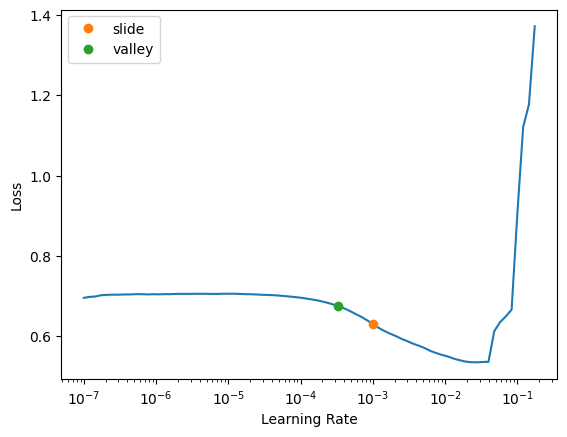

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(1, 6.75e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.164078,0.164377,0.898038,01:44


In [ ]:
learner.save("entertainment-ml-genre-stage-0")

Path('models/entertainment-ml-genre-stage-0.pth')

In [ ]:
learner.export("models/entertainment-ml-genre-stage-0.pkl")

## Stage - 1

In [ ]:
learner.unfreeze()

SuggestedLRs(slide=0.002511886414140463, valley=0.00010964782268274575)

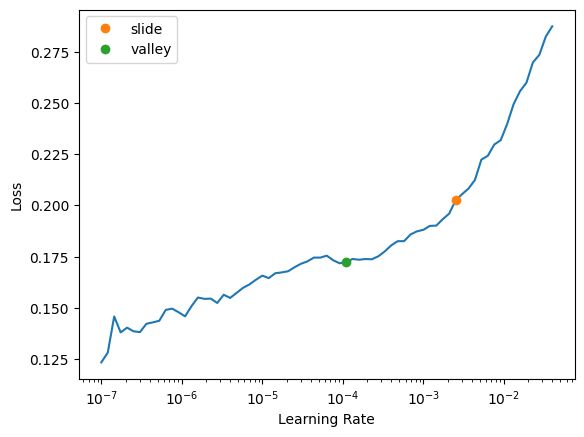

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(5,slice(2.25e-3, 1.25e-4))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.218188,0.197549,0.866692,02:08
1,0.321917,0.317584,0.861264,02:09
2,0.315798,0.314432,0.868909,02:07
3,0.315337,0.313607,0.838940,02:06
4,0.315758,0.312918,0.838940,02:08


In [ ]:
learner.save("entertainment-ml-genre-stage-1")

Path('models/entertainment-ml-genre-stage-1.pth')

In [ ]:
learner.export("models/entertainment-ml-genre-stage-1.pkl")

# Inference

In [ ]:
desc = "When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice."

In [ ]:
lbp = learner.blurr_predict(desc)[0]

In [ ]:
lbp

{'labels': [],
 'scores': [],
 'class_indices': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'class_labels': ['Fiction', 'pop', 'Thriller', 'Mystery', 'Crime', 'Drama', 'Indie', 'Action', 'Adventure', 'Romance', 'Casual', 'Comedy', 'Strategy', 'Simulation', 'Historical', 'Sci-Fi', 'Nonfiction', 'Horror', 'Fantasy', 'Young Adult'],
 'probs': [0.14854057133197784,
  0.04822634160518646,
  0.04958902671933174,
  0.06954174488782883,
  0.04903962090611458,
  0.14817041158676147,
  0.15921740233898163,
  0.21700547635555267,
  0.2018132209777832,
  0.1561049073934555,
  0.09235979616641998,
  0.13846179842948914,
  0.04288223758339882,
  0.04620574787259102,
  0.04107589274644852,
  0.055310651659965515,
  0.0593191459774971,
  0.060197047889232635,
  0.1755380779504776,
  0.055005285888910294]}

In [ ]:
learner_probs = lbp["probs"]
top_3_indices = sorted(range(len(learner_probs)), key=lambda i: learner_probs[i], reverse=True)[:3]
top_3_indices

[7, 8, 18]

In [ ]:
top_labels = []

for i in top_3_indices:
  top_labels.append(lbp["class_labels"][i])

top_labels

['Action', 'Adventure', 'Fantasy']

In [ ]:
top_probs = []

for i in top_3_indices:
  top_probs.append(lbp["probs"][i])

top_probs

[0.21700547635555267, 0.2018132209777832, 0.1755380779504776]

In [ ]:
result = {top_labels[i]: top_probs[i] for i in range(min(len(top_labels), len(top_probs)))}

print(result)


{'Action': 0.21700547635555267, 'Adventure': 0.2018132209777832, 'Fantasy': 0.1755380779504776}
